In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
import numpy as np
import re

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [17]:
# form mypalette
Mypalette=[]
for i in range(0,12):
    colors=plt.cm.Set3(i)
    Mypalette.append(colors)

In [2]:
from pylab import *

cmap = cm.get_cmap('Set3', 12)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#8dd3c7
#ffffb3
#bebada
#fb8072
#80b1d3
#fdb462
#b3de69
#fccde5
#d9d9d9
#bc80bd
#ccebc5
#ffed6f


In [18]:
Mypalette.append((1.0,1.0,1.0))
Mypalette.append(plt.cm.Paired(11))

In [8]:
matplotlib.colors.rgb2hex(plt.cm.Paired(11))

'#b15928'

In [19]:
# import node edge data

In [20]:
xcf_edge_data=pd.read_csv('datasets/xcf_ingr_edge.pkl',index_col=0)
xcf_node_data=pd.read_csv('datasets/xcf_ingr_node.pkl',index_col=0)

ars_edge_data=pd.read_csv('datasets/ars_ingr_edge.pkl',index_col=0)
ars_node_data=pd.read_csv('datasets/ars_ingr_node.pkl',index_col=0)

kb_edge_data=pd.read_csv('datasets/kb_ingr_edge.pkl',index_col=0)
kb_node_data=pd.read_csv('datasets/kb_ingr_node.pkl',index_col=0)

In [21]:
xcf_edge_data

,id_1,id_2,npmi,edge_type
0,mace,tamarind,1.000000,ingr-ingr
1,cardamom,mace,1.000000,ingr-ingr
2,tamarind,turmeric,1.000000,ingr-ingr
3,fenugreek,turmeric,1.000000,ingr-ingr
4,saffron,turmeric,1.000000,ingr-ingr
...,...,...,...,...
746,honey,milk,0.100967,ingr-ingr
747,cooking_oil,ham,0.100756,ingr-ingr
748,carrot,shrimp,0.100552,ingr-ingr
749,cucumber,tomato,0.100247,ingr-ingr


In [9]:
xcf_node_data.head()

,name,comb_cate,prevelence,node_type
0,mallard_duck,Animal Product,0.004227,ingr
1,pak_choy,Vegetable,0.004227,ingr
2,welsh_onion,Vegetable,0.118343,ingr
3,sausage,Dish,0.006340,ingr
4,cake,Dish,0.004227,ingr


In [22]:
print('There are {} nodes and {} edges in Xiachufang'.format(xcf_node_data.shape[0],xcf_edge_data.shape[0]))
print('There are {} nodes and {} edges in Allrecipes'.format(ars_node_data.shape[0],ars_edge_data.shape[0]))
print('There are {} nodes and {} edges in Kochbar'.format(kb_node_data.shape[0],kb_edge_data.shape[0]))

There are 130 nodes and 751 edges in Xiachufang
There are 143 nodes and 1144 edges in Allrecipes
There are 155 nodes and 1527 edges in Kochbar


In [23]:
def plot_ingr_networks(node_data,edge_data):
    G=nx.from_pandas_edgelist(edge_data,'id_1','id_2',['npmi','edge_type'])
    # add node attribute: https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx
    nx.set_node_attributes(G,node_data.set_index('name').to_dict('index'))
    
    nodelist=[]
    for node in G.nodes(data=True):
        nodelist.append(node[0])
        
    # the node size according to prevelence
    node_size=[]
    for node in G.nodes(data=True):
        #print(node[1]['prevelence'])
        node_size.append(node[1]['prevelence'])
    node_size_dict=dict(zip(nodelist,node_size))
    
    # the edge witdth according to npmi
    edge_weights=nx.get_edge_attributes(G,'npmi').values()
    
    # map the nodes and colors according to cateogory
    # https://stackoverflow.com/questions/28910766/python-networkx-set-node-color-automatically-based-on-number-of-attribute-opt
    node_color=[]
    for node in G.nodes(data=True):
        if 'Additive/Spice' in node[1]['comb_cate']:
            node_color.append(Mypalette[3])
        if 'Animal Product' in node[1]['comb_cate']:
            node_color.append(Mypalette[1])
        if 'Bakery' in node[1]['comb_cate']:
            node_color.append(Mypalette[13])
        if 'Beverage' in node[1]['comb_cate']:
            node_color.append(Mypalette[0])
        if 'Cereal/Maize' in node[1]['comb_cate']:
            node_color.append(Mypalette[4])
        if 'Dairy' in node[1]['comb_cate']:
            node_color.append(Mypalette[12])
        if 'Dish' in node[1]['comb_cate']:
            node_color.append(Mypalette[6])
        if 'Fish/Seafood' in node[1]['comb_cate']:
            node_color.append(Mypalette[7])
        if 'Fruit' in node[1]['comb_cate']:
            node_color.append(Mypalette[8])
        if 'Fungus' in node[1]['comb_cate']:
            node_color.append(Mypalette[9])
        if 'Herb' in node[1]['comb_cate']:
            node_color.append(Mypalette[10])
        if 'Plant/Plant Derivative' in node[1]['comb_cate']:
            node_color.append(Mypalette[11])
        if 'Seed/Nut/Legume' in node[1]['comb_cate']:
            node_color.append(Mypalette[5])
        if 'Vegetable' in node[1]['comb_cate']:
            node_color.append(Mypalette[2])
    
    fig,ax=plt.subplots(figsize=(20,15))
    pos=nx.spring_layout(G,k=0.5,seed=9527)
    nx.draw_networkx_nodes(G,pos,nodelist = nodelist,node_color=node_color,node_size=[v*10000 for v in node_size_dict.values()],edgecolors='black')
    nx.draw_networkx_edges(G,pos,alpha = 0.1,width=[i*10 for i in list(edge_weights)])
    labels=nx.draw_networkx_labels(G,pos,font_size=18)
    plt.tight_layout()
    plt.axis("off")

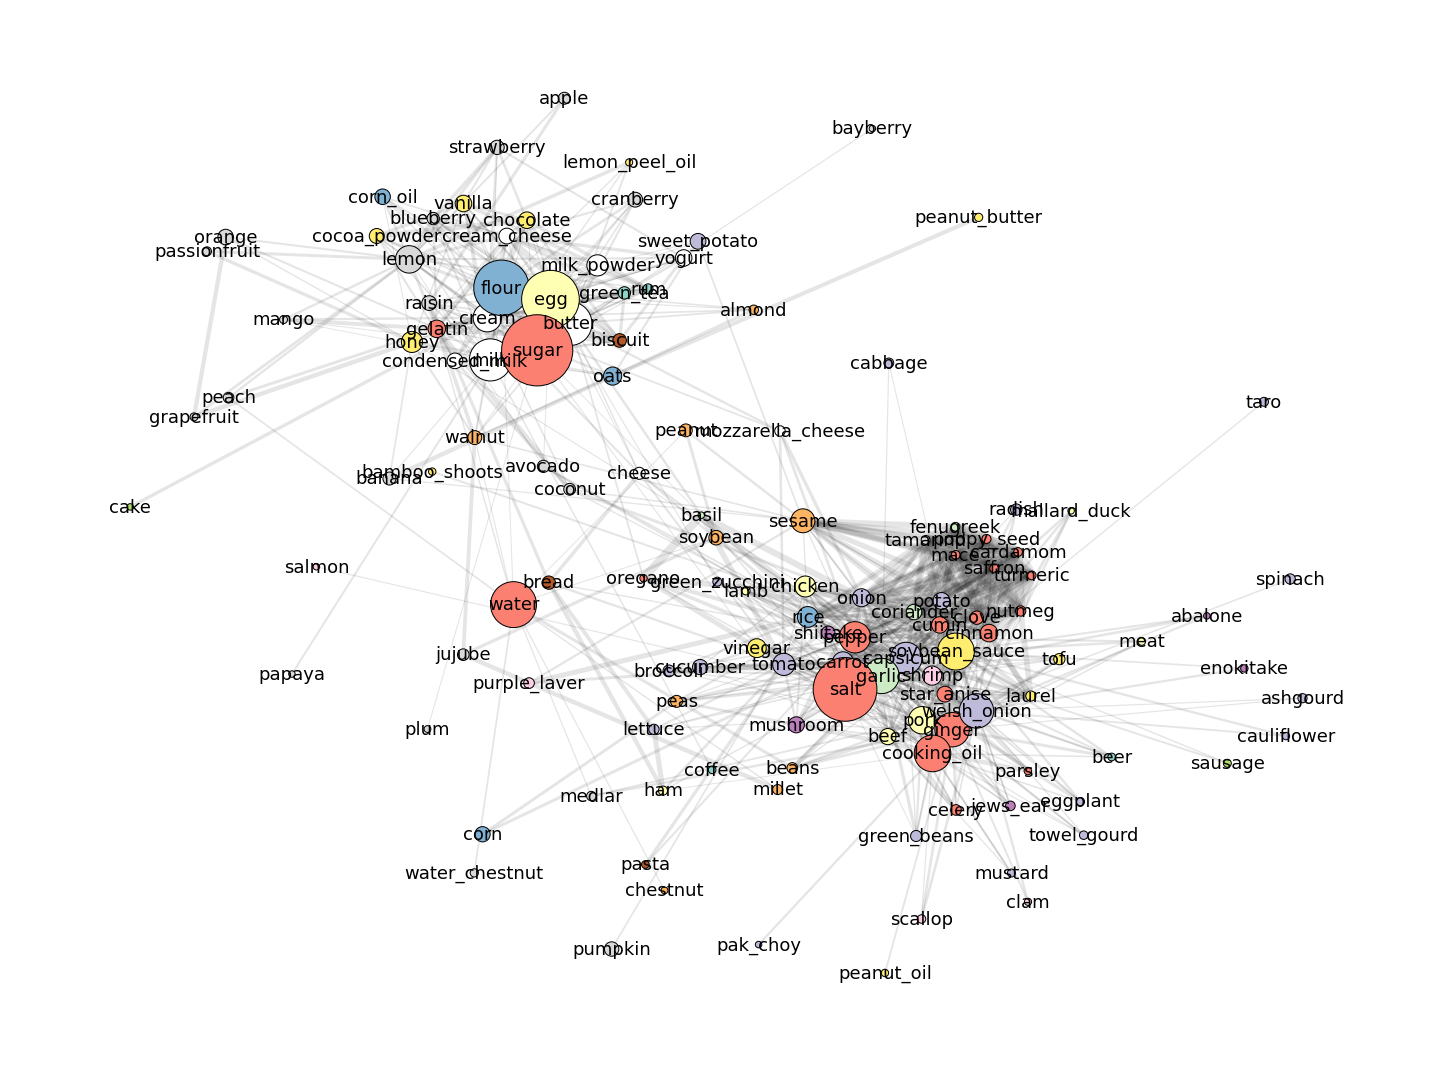

In [24]:
plot_ingr_networks(xcf_node_data,xcf_edge_data)
#plt.savefig('graphs/pdf/xcf_tb_npmi_network.pdf',dpi=300,bbox_inches='tight')
#plt.savefig('graphs/png/xcf_tb_npmi_network.png',dpi=300,bbox_inches='tight')

/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


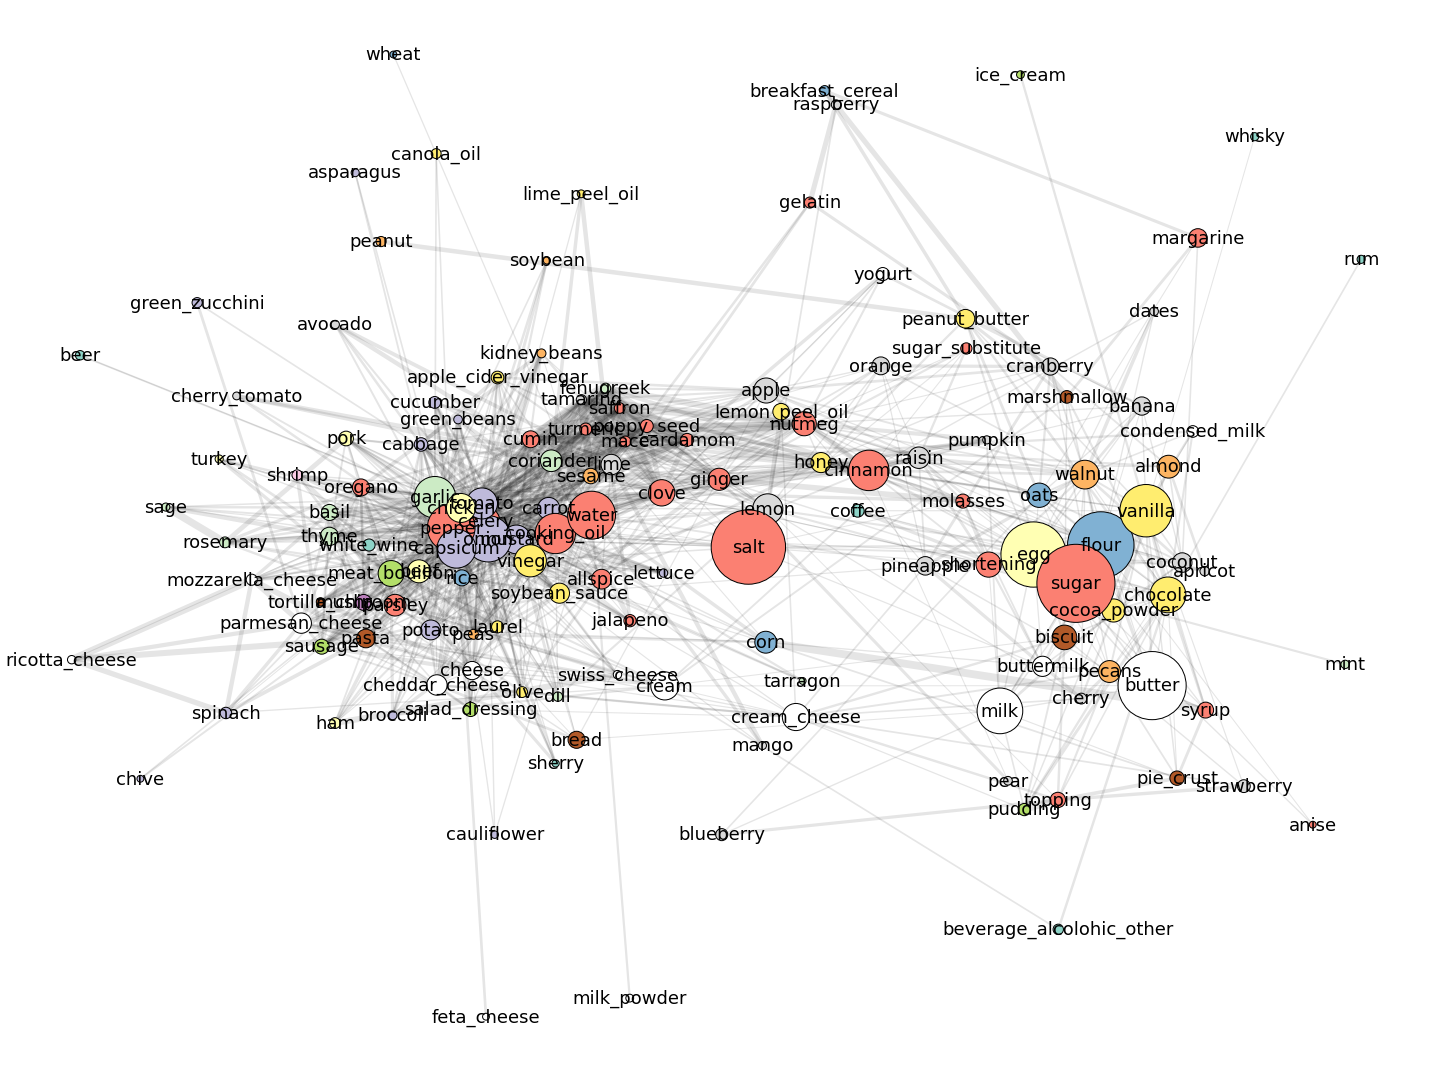

In [22]:
plot_ingr_networks(ars_node_data,ars_edge_data)
plt.savefig('graphs/pdf/ars_tb_npmi_network.pdf',dpi=300,bbox_inches='tight')
plt.savefig('graphs/png/ars_tb_npmi_network.png',dpi=300,bbox_inches='tight')

/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


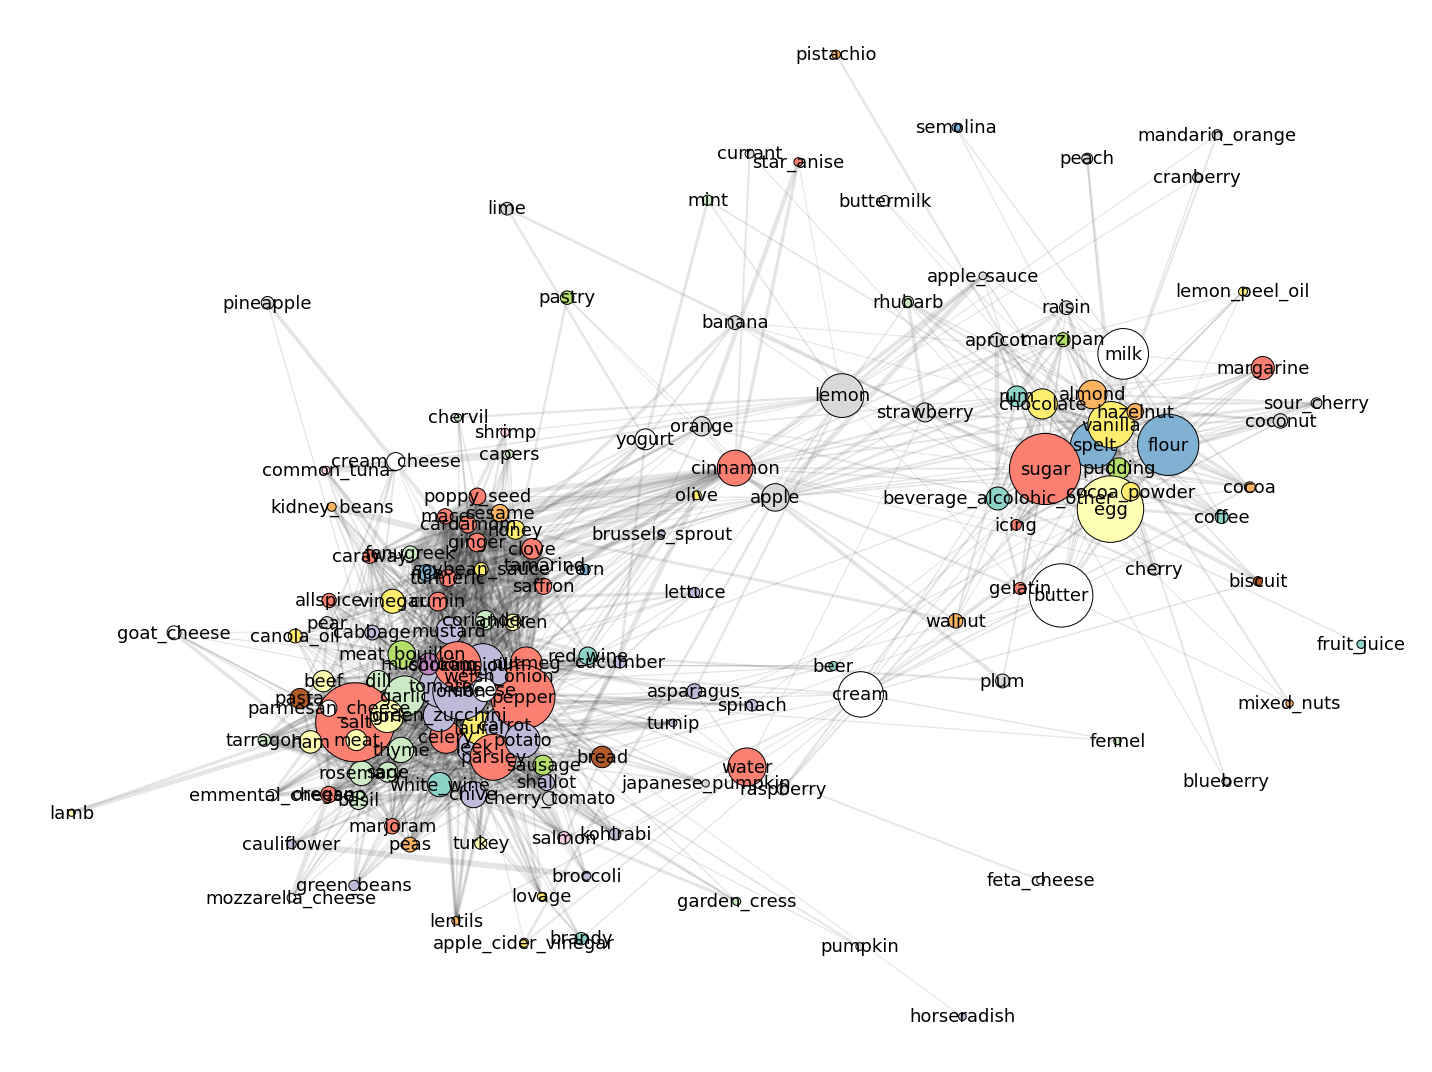

In [23]:
plot_ingr_networks(kb_node_data,kb_edge_data)
plt.savefig('graphs/pdf/kb_tb_npmi_network.pdf',dpi=300,bbox_inches='tight')
plt.savefig('graphs/png/kb_tb_npmi_network.png',dpi=300,bbox_inches='tight')